In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import rcParams

In [2]:
# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

In [3]:
# 1.Read the CPU performance data from this csv file into a Pandas DataFrame named 'df'. 
url = "https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
# You may want to add the 'clock speed' feature, as shown in the hints section below.
df['cs'] = np.round(1e3/df['myct'], 2) # clock speed in MHz (millions of cycles/sec)
df.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp,cs
0,adviser,32/60,125,256,6000,256,16,128,198,199,8.00
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253,34.48
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253,34.48
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253,34.48
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132,34.48


In [6]:
# 2.Look at the information on the following page to learn about what the column names mean.  ‘prp’ is the variable that we will try to estimate with linear regression.
# PRP: published relative performance (integer) 

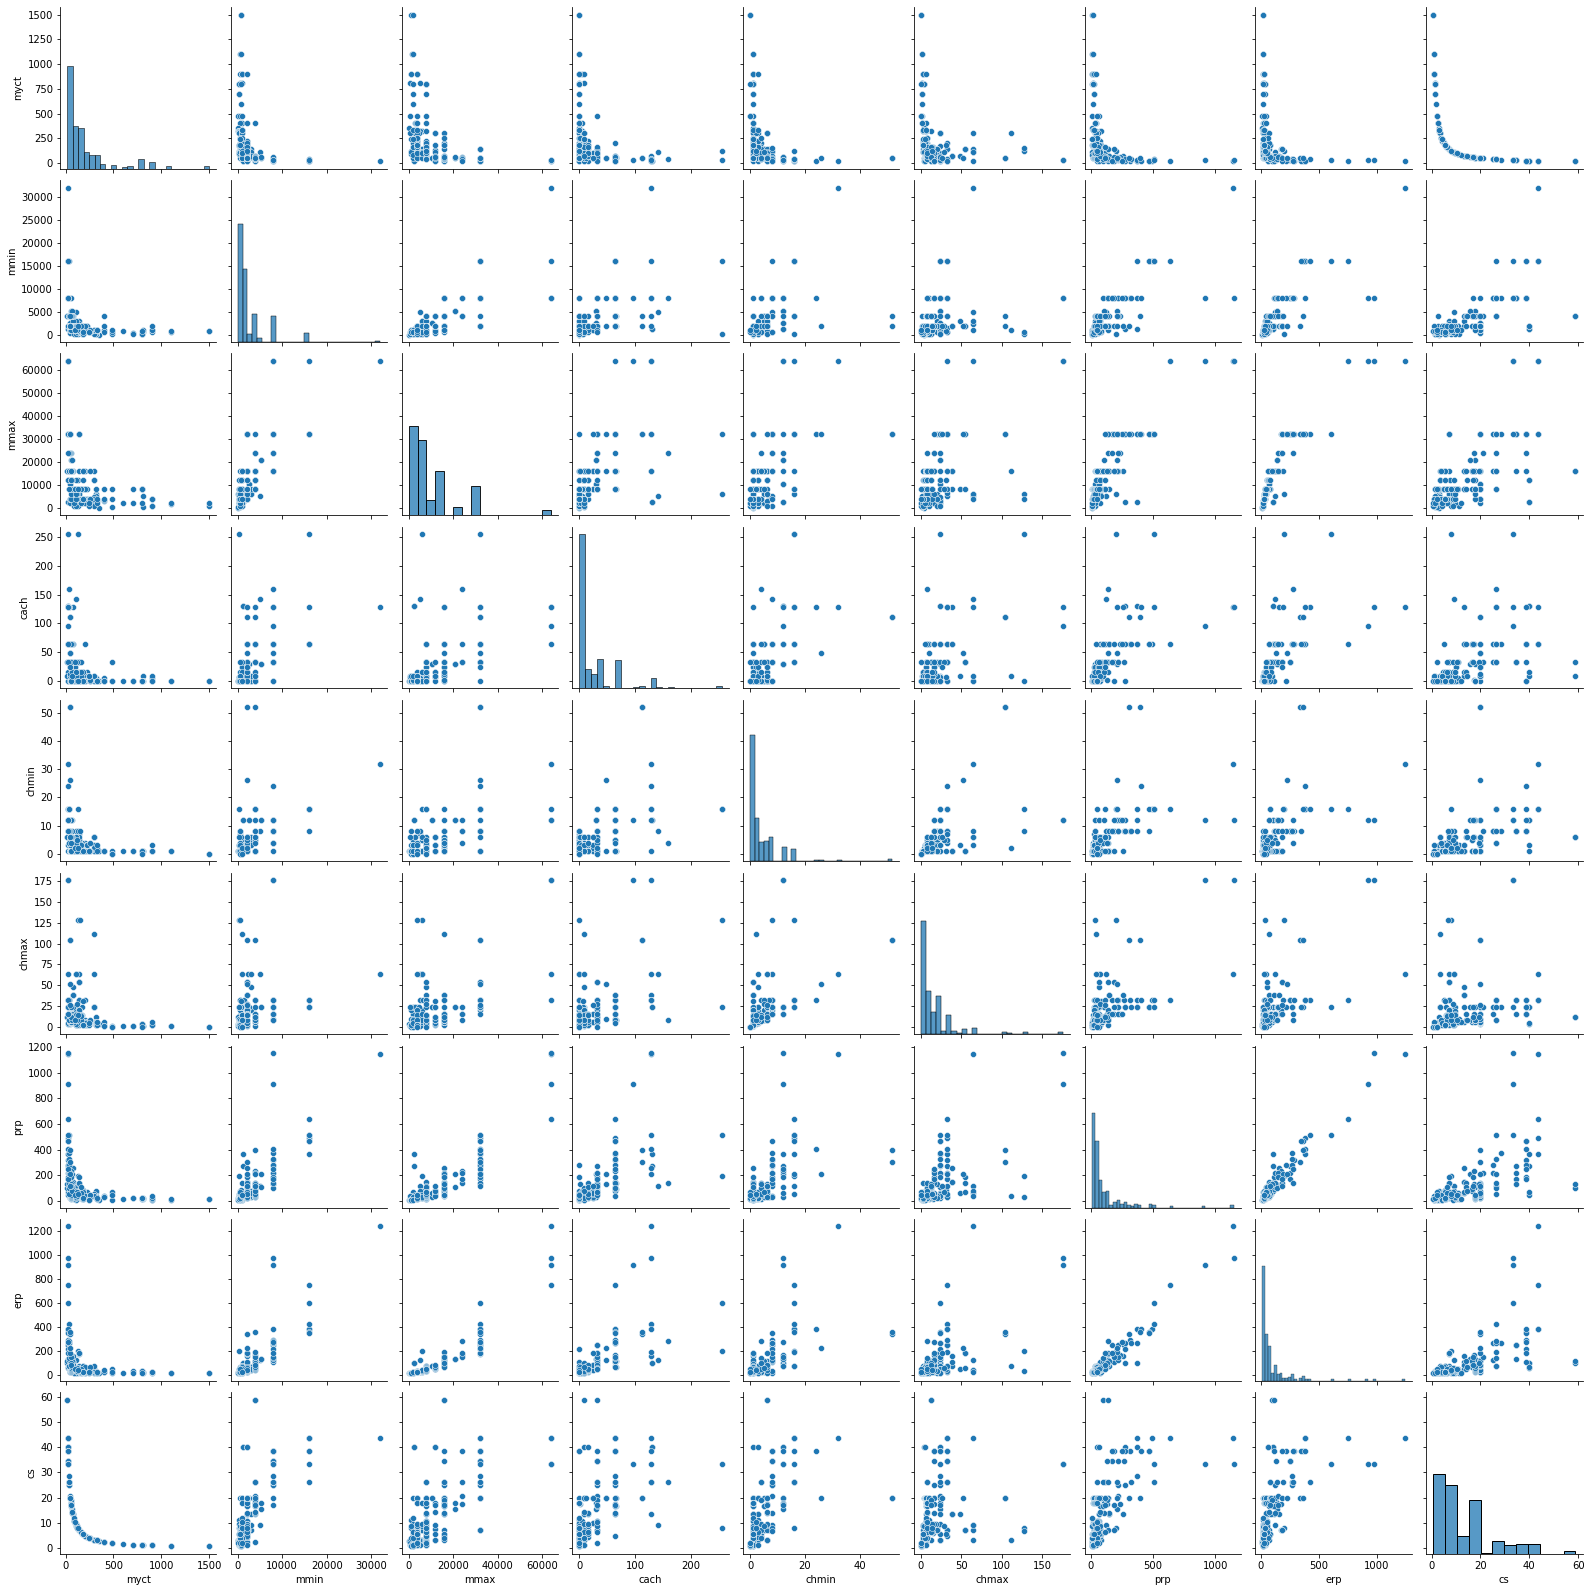

In [7]:
# 3. Create a matrix of scatter plots using the Seaborn pairplot function.  
# Do some features appear to be strongly correlated?
# MYCT: machine cycle time in nanoseconds (integer) with everything else
sns.pairplot(df)

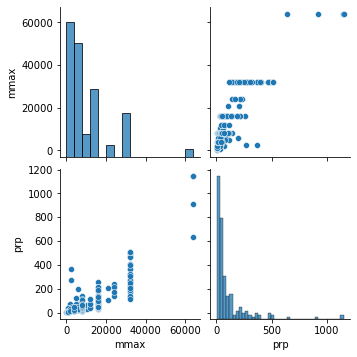

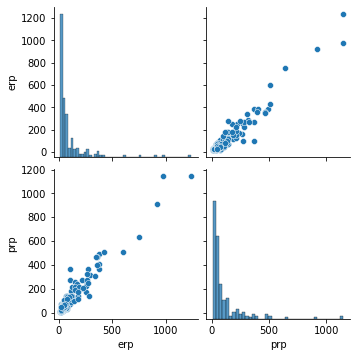

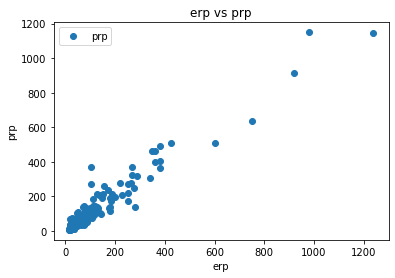

In [8]:
# 4. Pick a feature (like ‘mmin’, ‘mmax’, ‘cach’, etc.) and produce a scatterplot with that feature on the x axis and ‘prp’ on the y axis.  
# Does prp seem to change linearly with respect to the feature you chose?  Describe the pattern: what is the trend, how focused is the pattern, are there outliers, etc.?
# sns.pairplot(df[['mmin', 'prp']])
# # Low prp low mmin, high prp high mmin
sns.pairplot(df[['mmax', 'prp']])
# # positive correlation
sns.pairplot(df[['erp', 'prp']])
# hard to tell about a correlation

df.plot(x='erp', y='prp', style='o')
plt.title('erp vs prp')
plt.xlabel('erp')
plt.ylabel('prp')
plt.show()

In [9]:
"""
5.Fit a linear model to the data using sklearn.linear_model.LinearRegression.  
The model should have ‘prp’ as its target variable, and the feature you chose as its single predictor variable.  
Assign the model to variable ‘fit’.
"""
# x = predictor/independent, y = target/dependent var

# convert to NumPy arrays
X = df[['erp']].values #2D
y = df['prp'].values #1D

# FIT THE MODEL
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

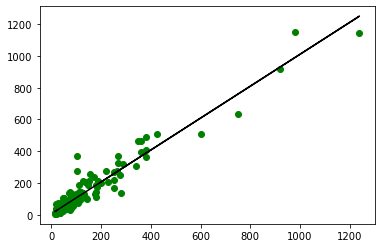

In [10]:
"""
6. Plot the predicted relationship on top of your plot of problem 4 above.  
Compare your plot to the one you would get with Seaborn's regplot (which will find and plot the regression line for you).
"""

plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')

plt.show()

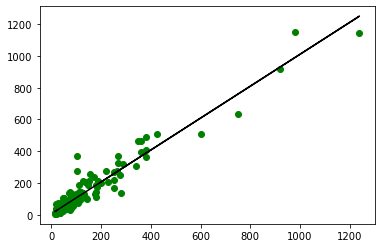

In [11]:
"""
7. Create a scatterplot with the actual 'prp' value on the X axis and the predicted 'prp' value on the Y axis.   
If your predictions were great, what would this plot look like?
"""

plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')

plt.show()